In [3]:
import anndata as ad
import numpy as np
import scanpy as sc
import pandas as pd
import openpyxl
import csv
import matplotlib
import scipy.stats as sp
import xgboost as xgb
import pickle
from sklearn.metrics import confusion_matrix, adjusted_rand_score
import matplotlib.pyplot as plt
from matplotlib import gridspec
import scrublet as scr
import scvelo as scv
import loompy

In [2]:
N1_V2L_loom = scv.read('H:/Tan_single_cell/velocyto/N1_V2L.loom',cache=True)
N2_V2L_loom = scv.read('H:/Tan_single_cell/velocyto/N2_V2L.loom',cache=True)
D1_V2L_loom = scv.read('H:/Tan_single_cell/velocyto/D1_V2L.loom',cache=True)
D2_V2L_loom = scv.read('H:/Tan_single_cell/velocyto/D2_V2L.loom',cache=True)


In [6]:
N_V2L_list = ['H:/Tan_single_cell/velocyto/N1_V2L.loom','H:/Tan_single_cell/velocyto/N2_V2L.loom']
D_V2L_list = ['H:/Tan_single_cell/velocyto/D1_V2L.loom','H:/Tan_single_cell/velocyto/D2_V2L.loom']
loompy.combine(N_V2L_list, 'N_V2L.loom',key='Accession')
loompy.combine(D_V2L_list, 'D_V2L.loom',key='Accession')

In [16]:
N_V2L_loom = scv.read('F:/RNA_velocity/V2L/N_V2L.loom',cache=True)
D_V2L_loom = scv.read('F:/RNA_velocity/V2L/D_V2L.loom',cache=True)

In [4]:
N_V2L_Glut = scv.read('F:/RNA_velocity/V2L/V2L_NR_glut_ann.h5ad',cache=True)
D_V2L_Glut = scv.read('F:/RNA_velocity/V2L/V2L_DR_glut_ann.h5ad',cache=True)

In [5]:
N_V2L_Glut.obs.to_csv('N_V2L_Glut.csv')
D_V2L_Glut.obs.to_csv('D_V2L_Glut.csv')
N_V2L_loom.obs.to_csv('N_V2L_loom.csv')
D_V2L_loom.obs.to_csv('D_V2L_loom.csv')

In [8]:
h5ad_short_name = pd.read_csv('F:/RNA_velocity/V2L/N_V2L_Glut.csv',index_col='cell_id')
loom_short_name = pd.read_csv('F:/RNA_velocity/V2L/N_V2L_loom.csv',index_col='cell_id')
N_V2L_Glut.obs['short_name'] = h5ad_short_name
N_V2L_loom.obs['short_name'] = loom_short_name
N_V2L_Glut.write_h5ad('F:/RNA_velocity/V2L/NR_V2L_Glut_short.h5ad')
N_V2L_loom.write_h5ad('F:/RNA_velocity/V2L/NR_V2L_short.loom')

In [9]:
D_h5ad_short_name = pd.read_csv('F:/RNA_velocity/V2L/D_V2L_Glut.csv',index_col='cell_id')
D_loom_short_name = pd.read_csv('F:/RNA_velocity/V2L/D_V2L_loom.csv',index_col='cell_id')
D_V2L_Glut.obs['short_name'] = D_h5ad_short_name
D_V2L_loom.obs['short_name'] = D_loom_short_name
D_V2L_Glut.write_h5ad('F:/RNA_velocity/V2L/DR_V2L_short.h5ad')
D_V2L_loom.write_h5ad('F:/RNA_velocity/V2L/DR_V2L_short.loom')

In [10]:
N_V2L_Glut_cell = N_V2L_Glut.obs['short_name'].tolist()
D_V2L_Glut_cell = D_V2L_Glut.obs['short_name'].tolist()

In [11]:
N_V2L_filtered_ldata = N_V2L_loom[N_V2L_loom.obs['short_name'].isin(N_V2L_Glut_cell)]
D_V2L_filtered_ldata = D_V2L_loom[D_V2L_loom.obs['short_name'].isin(D_V2L_Glut_cell)]

In [12]:
N_V2L_Glut_V= scv.utils.merge(N_V2L_Glut,N_V2L_filtered_ldata)
D_V2L_Glut_V= scv.utils.merge(D_V2L_Glut,D_V2L_filtered_ldata)
N_V2L_Glut_V, D_V2L_Glut_V

(AnnData object with n_obs × n_vars = 13471 × 21549
     obs: 'n_genes', 'percent_mito', 'n_counts', 'doublet_score', 'predicted_doublet', 'Sample', 'Class', 'Subclass', 'Subtype', 'Ann_subclass_cell', 'Type', 'short_name', 'sample_batch', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size'
     var: 'gene_ids', 'feature_types', 'n_cells-V2L_1', 'highly_variable-V2L_1', 'means-V2L_1', 'dispersions-V2L_1', 'dispersions_norm-V2L_1', 'n_cells-V2L_2', 'highly_variable-V2L_2', 'means-V2L_2', 'dispersions-V2L_2', 'dispersions_norm-V2L_2', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
     uns: 'Class_colors', 'Sample_colors', 'Subclass_colors', 'Subtype_colors', 'dendrogram_leiden_res_1.50', 'hvg', 'leiden_res_1.50', 'leiden_res_1.50_colors', 'neighbors', 'pca', 'umap'
     obsm: 'X_pca', 'X_umap'
     varm: 'PCs'
     layers: 'counts', 'ambiguous', 'matrix', 'spliced', 'unspliced'
     obsp: 'connectivities', 

In [13]:
N_V2L_Glut_V.write_h5ad('F:/RNA_velocity/V2L/NR_V2L_Glut_V.h5ad')
D_V2L_Glut_V.write_h5ad('F:/RNA_velocity/V2L/DR_V2L_Glut_V.h5ad')

In [5]:
N_V2L_L23_V =N_V2L_Glut_V[N_V2L_Glut_V.obs['Subclass']=='L2/3 IT CTX']
D_V2L_L23_V =D_V2L_Glut_V[D_V2L_Glut_V.obs['Subclass']=='L2/3 IT CTX']
N_V2L_L23_V, D_V2L_L23_V

(View of AnnData object with n_obs × n_vars = 4788 × 21549
     obs: 'n_genes', 'percent_mito', 'n_counts', 'doublet_score', 'predicted_doublet', 'Sample', 'Class', 'Subclass', 'Subtype', 'Ann_subclass_cell', 'Type', 'short_name', 'sample_batch', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size'
     var: 'gene_ids', 'feature_types', 'n_cells-V2L_1', 'highly_variable-V2L_1', 'means-V2L_1', 'dispersions-V2L_1', 'dispersions_norm-V2L_1', 'n_cells-V2L_2', 'highly_variable-V2L_2', 'means-V2L_2', 'dispersions-V2L_2', 'dispersions_norm-V2L_2', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
     uns: 'Class_colors', 'Sample_colors', 'Subclass_colors', 'Subtype_colors', 'dendrogram_leiden_res_1.50', 'hvg', 'leiden_res_1.50', 'leiden_res_1.50_colors', 'neighbors', 'pca', 'umap'
     obsm: 'X_pca', 'X_umap'
     varm: 'PCs'
     layers: 'ambiguous', 'counts', 'matrix', 'spliced', 'unspliced'
     obsp: 'connectivi

In [9]:
sc.pp.highly_variable_genes(N_V2L_L23_V, min_mean=0.0125, max_mean=3, min_disp=0.5,flavor='seurat')
sc.pp.highly_variable_genes(D_V2L_L23_V, min_mean=0.0125, max_mean=3, min_disp=0.5,flavor='seurat')

In [10]:
HVG_N_L23 = N_V2L_L23_V[:,N_V2L_L23_V.var.highly_variable]
HVG_D_L23 = D_V2L_L23_V[:,D_V2L_L23_V.var.highly_variable]

In [11]:
HVG_N_L23,HVG_D_L23

(View of AnnData object with n_obs × n_vars = 4788 × 3085
     obs: 'n_genes', 'percent_mito', 'n_counts', 'doublet_score', 'predicted_doublet', 'Sample', 'Class', 'Subclass', 'Subtype', 'Ann_subclass_cell', 'Type', 'short_name', 'sample_batch', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size'
     var: 'gene_ids', 'feature_types', 'n_cells-V2L_1', 'highly_variable-V2L_1', 'means-V2L_1', 'dispersions-V2L_1', 'dispersions_norm-V2L_1', 'n_cells-V2L_2', 'highly_variable-V2L_2', 'means-V2L_2', 'dispersions-V2L_2', 'dispersions_norm-V2L_2', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
     uns: 'Class_colors', 'Sample_colors', 'Subclass_colors', 'Subtype_colors', 'dendrogram_leiden_res_1.50', 'hvg', 'leiden_res_1.50', 'leiden_res_1.50_colors', 'neighbors', 'pca', 'umap'
     obsm: 'X_pca', 'X_umap'
     varm: 'PCs'
     layers: 'ambiguous', 'counts', 'matrix', 'spliced', 'unspliced'
     obsp: 'connectivit

In [5]:
scv.pp.filter_and_normalize(HVG_N_L23)
#scv.pp.pca(N_V2L_L23_V)
scv.pp.moments(HVG_N_L23,n_pcs=30,n_neighbors=30)
#scv.tl.umap(N_V2L_L23_V)
scv.tl.recover_dynamics(HVG_N_L23)
scv.tl.velocity(HVG_N_L23,mode='dynamical')
scv.tl.velocity_graph(HVG_N_L23)

Logarithmized X.
computing moments based on connectivities


E:\Python\lib\site-packages\scvelo\preprocessing\utils.py:705: DeprecationWarning: `log1p` is deprecated since scVelo v0.3.0 and will be removed in a future version. Please use `log1p` from `scanpy.pp` instead.
  log1p(adata)


    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
recovering dynamics (using 1/24 cores)


  0%|          | 0/48 [00:00<?, ?gene/s]

    finished (0:00:29) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)
computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/24 cores)


  0%|          | 0/4786 [00:00<?, ?cells/s]

    finished (0:00:02) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


In [16]:
N_V2L_L23_V.write_h5ad('F:/RNA_velocity/V2L/NR_V2L_L23_V.h5ad')

saving figure to file ./figures/scvelo_V2L_NR_l23_scvelo.pdf


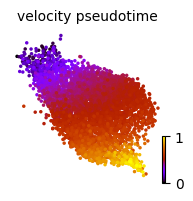

saving figure to file ./figures/scvelo_V2L_NR_l23_scelltype.pdf


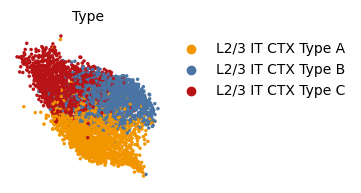

In [7]:
scv.tl.velocity_pseudotime(HVG_N_L23,root_key='CGGAATTAGCTA')
scv.pl.scatter(HVG_N_L23, color='velocity_pseudotime',cmap='gnuplot',legend_loc='right margin',figsize=(2,2),save='V2L_NR_l23_scvelo.pdf')
scv.pl.umap(HVG_N_L23, color='Type',palette=["#f29600","#4974a4","#b81316"],figsize=(2,2),save='V2L_NR_l23_scelltype.pdf')

In [11]:
HVG_N_L23.obs['velocity_pseudotime'].to_csv('HVG_N_V2L_L23_pseudotime.csv')

In [17]:
scv.pp.filter_and_normalize(HVG_D_L23)
#scv.pp.pca(HVG_D_L23)
scv.pp.moments(HVG_D_L23,n_pcs=30,n_neighbors=30)
#scv.tl.umap(N_V2L_L23_V)
scv.tl.recover_dynamics(HVG_D_L23)
scv.tl.velocity(HVG_D_L23,mode='dynamical')
scv.tl.velocity_graph(HVG_D_L23)

Normalized count data: spliced, unspliced.
Logarithmized X.
computing neighbors


E:\Python\lib\site-packages\scvelo\preprocessing\utils.py:705: DeprecationWarning: `log1p` is deprecated since scVelo v0.3.0 and will be removed in a future version. Please use `log1p` from `scanpy.pp` instead.
  log1p(adata)


    finished (0:00:00) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
recovering dynamics (using 1/24 cores)


  0%|          | 0/93 [00:00<?, ?gene/s]

    finished (0:00:55) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)
computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/24 cores)


  0%|          | 0/4155 [00:00<?, ?cells/s]

    finished (0:00:02) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


saving figure to file ./figures/scvelo_V2L_DR_l23_scvelo.pdf


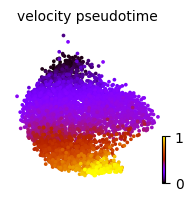

saving figure to file ./figures/scvelo_V2L_DR_l23_scelltype.pdf


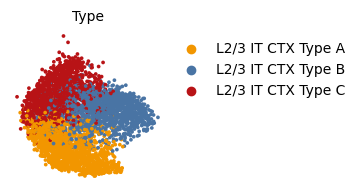

In [18]:
scv.tl.velocity_pseudotime(HVG_D_L23,end_key='CTCCTTTTCAGC',root_key='TATCCTACATAC')
scv.pl.scatter(HVG_D_L23, color='velocity_pseudotime',cmap='gnuplot',legend_loc='right margin',figsize=(2,2),save='V2L_DR_l23_scvelo.pdf')
scv.pl.umap(HVG_D_L23, color='Type',palette=["#f29600","#4974a4","#b81316"],figsize=(2,2),save='V2L_DR_l23_scelltype.pdf')

In [15]:
HVG_D_L23.obs['velocity_pseudotime'].to_csv('HVG_DR_V2L_L23_pseudotime.csv')